<a href="https://colab.research.google.com/github/KimJisanER/MedBioPha/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heart Disease Prediction Dataset

11 clinical features for predicting heart disease events.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
import seaborn as sns

In [2]:
path = '/content/drive/MyDrive/heart/heart.csv'

data=pd.read_csv(path)

pd.set_option('display.max_columns',20)

print(data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
data.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

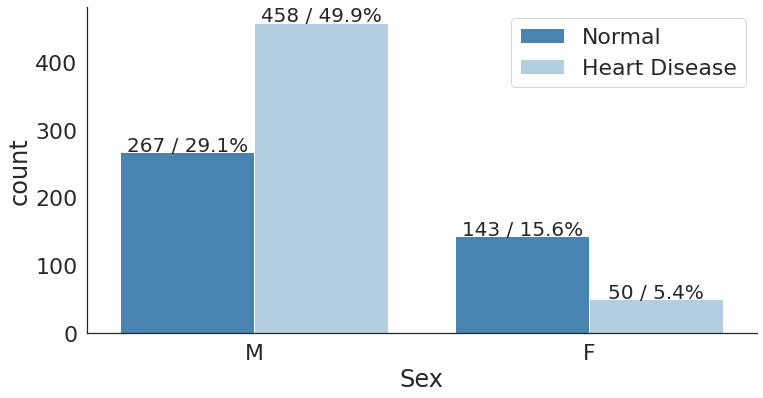

In [17]:
labels = ['Normal','Heart Disease']

total_cnt = data['HeartDisease'].count()
plt.figure(figsize=(12,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=data, x='Sex',hue='HeartDisease',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

In [ ]:
data.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

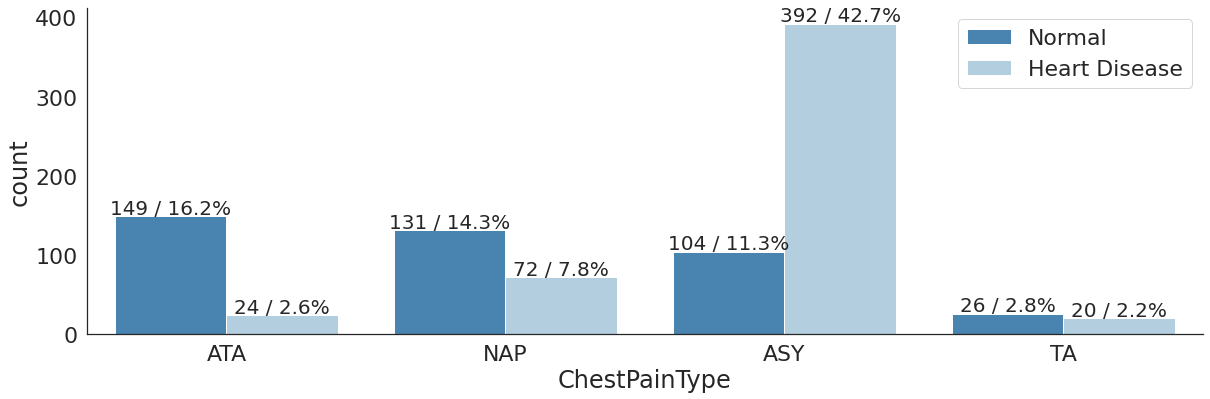

In [19]:
total_cnt = data['HeartDisease'].count()
plt.figure(figsize=(20,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=data, x='ChestPainType',hue='HeartDisease',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

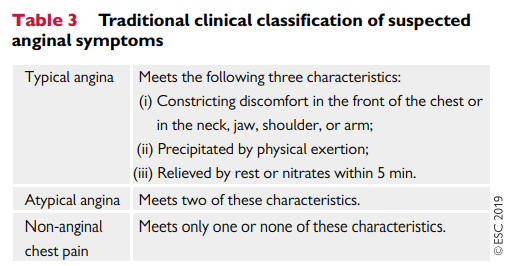

In [ ]:
data.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

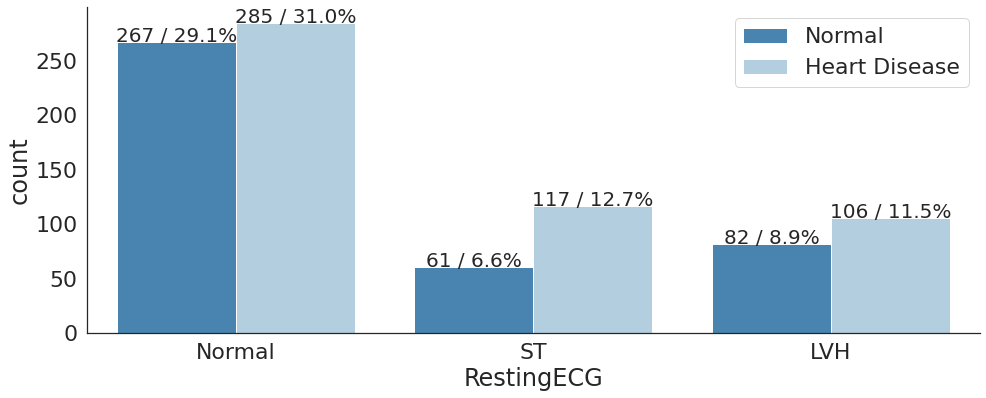

In [15]:

total_cnt = data['HeartDisease'].count()
plt.figure(figsize=(16,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=data, x='RestingECG',hue='HeartDisease',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 5, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

In [ ]:
data.ExerciseAngina.value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [ ]:
data.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
data['Sex']=np.where(data['Sex'].values=='M',1,np.where(data['Sex'].values=='F',0,np.nan))

data['ExerciseAngina']=np.where(data['ExerciseAngina'].values=='Y',1,0)

data = pd.concat([data,pd.get_dummies(data[['ChestPainType','ST_Slope','RestingECG']])],axis=1)
data = data.drop(['ChestPainType','ST_Slope','RestingECG'],axis=1)

print(data.head())

   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40  1.0        140          289          0    172               0   
1   49  0.0        160          180          0    156               0   
2   37  1.0        130          283          0     98               0   
3   48  0.0        138          214          0    108               1   
4   54  1.0        150          195          0    122               0   

   Oldpeak  HeartDisease  ChestPainType_ASY  ChestPainType_ATA  \
0      0.0             0                  0                  1   
1      1.0             1                  0                  0   
2      0.0             0                  0                  1   
3      1.5             1                  1                  0   
4      0.0             0                  0                  0   

   ChestPainType_NAP  ChestPainType_TA  ST_Slope_Down  ST_Slope_Flat  \
0                  0                 0              0              0   
1                  1

(array([  1.,   0.,   0.,   0.,  12., 148., 430., 234.,  73.,  20.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <a list of 10 Patch objects>)

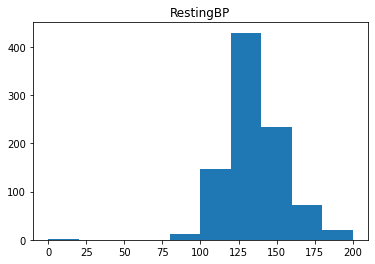

In [ ]:
plt.title('RestingBP')
plt.hist(data['RestingBP'])

Resting BP 값이 0인 것은 이상치 > 처리


In [ ]:
data=data[data['RestingBP']!=0]

(array([  1.,  30., 116., 208., 235., 210.,  74.,  20.,  16.,   7.]),
 array([ 80.,  92., 104., 116., 128., 140., 152., 164., 176., 188., 200.]),
 <a list of 10 Patch objects>)

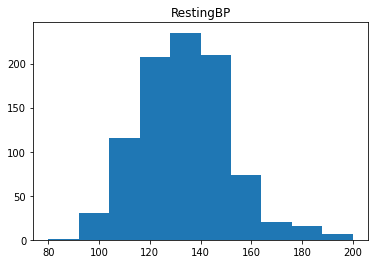

In [ ]:
plt.title('RestingBP')
plt.hist(data['RestingBP'])

(array([171.,   6.,  70., 319., 248.,  81.,  14.,   3.,   3.,   2.]),
 array([  0. ,  60.3, 120.6, 180.9, 241.2, 301.5, 361.8, 422.1, 482.4,
        542.7, 603. ]),
 <a list of 10 Patch objects>)

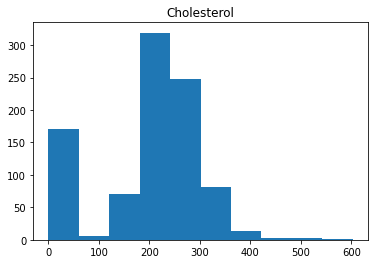

In [ ]:
plt.title('Cholesterol')
plt.hist(data['Cholesterol'])

In [ ]:
data.Cholesterol.value_counts()

0      171
254     11
223     10
220     10
230      9
      ... 
355      1
354      1
353      1
349      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

In [ ]:
print(data[(data['ChestPainType_TA']==1)&(data['Cholesterol']==0)])

     Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
294   32  1.0         95            0          1    127               0   
335   62  1.0        120            0          1    134               0   
355   67  1.0        145            0          0    125               0   
396   62  0.0        140            0          1    143               0   
492   49  1.0        130            0          0    145               0   

     Oldpeak  HeartDisease  ChestPainType_ASY  ChestPainType_ATA  \
294      0.7             1                  0                  0   
335     -0.8             1                  0                  0   
355      0.0             1                  0                  0   
396      0.0             1                  0                  0   
492      3.0             1                  0                  0   

     ChestPainType_NAP  ChestPainType_TA  ST_Slope_Down  ST_Slope_Flat  \
294                  0                 1              0           

data['Cholesterol']==0 인 값이 171개나 되고
TA 증상을 갖는데도 ['Cholesterol']==0 인 값이 있으므로
0은 결측치라고 생각됨.

(array([703.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 214.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

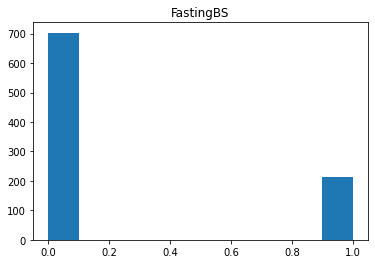

In [ ]:
plt.title('FastingBS')
plt.hist(data['FastingBS'])

(array([  2.,   5., 374., 118., 235., 119.,  44.,  17.,   1.,   2.]),
 array([-2.6 , -1.72, -0.84,  0.04,  0.92,  1.8 ,  2.68,  3.56,  4.44,
         5.32,  6.2 ]),
 <a list of 10 Patch objects>)

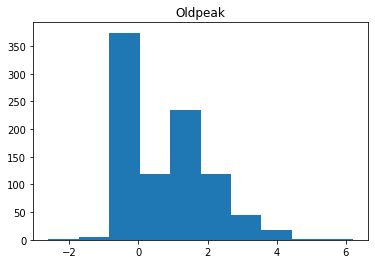

In [ ]:
plt.title('Oldpeak')
plt.hist(data['Oldpeak'])

In [ ]:
X_ch=data[data['Cholesterol']!=0]
y_ch= data['Cholesterol']
X_ch= data.drop(columns='Cholesterol')
print(X_ch)

     Age  Sex  RestingBP  FastingBS  MaxHR  ExerciseAngina  Oldpeak  \
0     40  1.0        140          0    172               0      0.0   
1     49  0.0        160          0    156               0      1.0   
2     37  1.0        130          0     98               0      0.0   
3     48  0.0        138          0    108               1      1.5   
4     54  1.0        150          0    122               0      0.0   
..   ...  ...        ...        ...    ...             ...      ...   
913   45  1.0        110          0    132               0      1.2   
914   68  1.0        144          1    141               0      3.4   
915   57  1.0        130          0    115               1      1.2   
916   57  0.0        130          0    174               0      0.0   
917   38  1.0        138          0    173               0      0.0   

     HeartDisease  ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0               0                  0                  1              

In [ ]:
ch_model = RandomForestRegressor(max_depth=5, n_estimators=200)
ch_model.fit(X_ch,y_ch)
data['Cholesterol'].iloc[np.where(data['Cholesterol']==0)] =  ch_model.predict(data[data['Cholesterol']==0].drop(columns='Cholesterol'))


(array([ 44.,  67., 143., 353., 230.,  59.,  13.,   3.,   3.,   2.]),
 array([ 14.5878723 ,  73.42908507, 132.27029784, 191.11151061,
        249.95272338, 308.79393615, 367.63514892, 426.47636169,
        485.31757446, 544.15878723, 603.        ]),
 <a list of 10 Patch objects>)

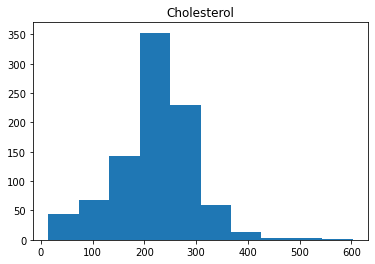

In [ ]:
plt.title('Cholesterol')
plt.hist(data['Cholesterol'])

In [ ]:
data.Cholesterol.value_counts()

254.000000    11
220.000000    10
223.000000    10
211.000000     9
204.000000     9
              ..
393.000000     1
91.914349      1
62.979260      1
180.210539     1
172.472930     1
Name: Cholesterol, Length: 392, dtype: int64

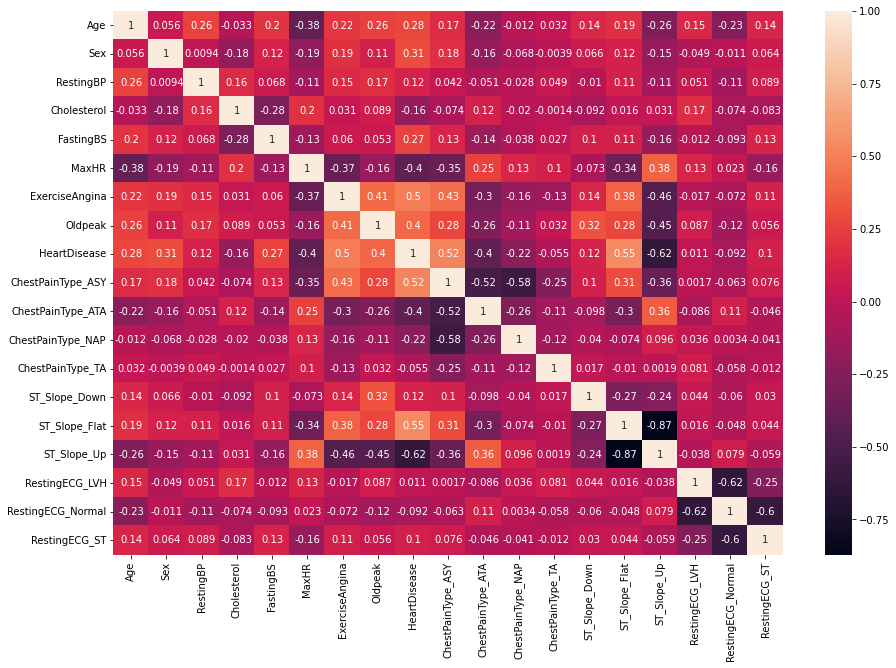

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
X_train=data.drop(columns='HeartDisease')
y_train=data['HeartDisease']

In [ ]:
models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class = 'ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('RFC',RandomForestClassifier()))
models.append(('XGBC',XGBClassifier(iterations=10000,verbose=False)))
models.append(('LGBMC',LGBMClassifier()))
models.append(('AdaC',AdaBoostClassifier()))
results =[]
names = []
for name, model in models:
  kfold = KFold(n_splits=10,random_state=7,shuffle = True)
  cv_results = cross_val_score(model,X_train
                               ,y_train
                               ,cv= kfold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s : %f (%f) "%(name,cv_results.mean(),cv_results.std())
  print(msg)

LR : 0.863533 (0.046995) 
LDA : 0.860272 (0.046356) 
KNN : 0.673829 (0.034393) 
CART : 0.792750 (0.033348) 
NB : 0.850454 (0.044316) 
SVM : 0.587781 (0.049583) 
RFC : 0.870186 (0.040008) 
XGBC : 0.865779 (0.025458) 
LGBMC : 0.861443 (0.033446) 
AdaC : 0.842869 (0.038015) 


In [ ]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_train,y_train)

results =[]
names = []
kfold = KFold(n_splits=10,random_state=7,shuffle = True)
cv_results = cross_val_score(model,X_train,y_train,cv= kfold,scoring='accuracy')
results.append(cv_results)
names.append(name)
msg = "%s : %f (%f) "%('RFC',cv_results.mean(),cv_results.std())
print(msg)

RFC : 0.871261 (0.043685) 
